In [195]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

def list_directory_tree_with_os_walk(starting_directory):
    for root, directories, files in os.walk(starting_directory):
        print(f"Directory: {root}")
        for file in files:
            print(f"  File: {file}")

list_directory_tree_with_os_walk('.')

Directory: .
  File: my_first_submission.csv
  File: .DS_Store
  File: test.csv
  File: data_analytics.ipynb
  File: .gitignore
  File: output.png
  File: Readme1.md
  File: sample_submission.csv
  File: read_files.ipynb
Directory: ./A
  File: X_train_observed.parquet
  File: train_targets.parquet
  File: X_train_estimated.parquet
  File: X_test_estimated.parquet
Directory: ./.git
  File: ORIG_HEAD
  File: config
  File: HEAD
  File: description
  File: index
  File: COMMIT_EDITMSG
  File: FETCH_HEAD
Directory: ./.git/objects
Directory: ./.git/objects/50
  File: be1c9b98460d33038ec63cdd7cc37ddbed78e8
Directory: ./.git/objects/9b
  File: da359a00da91ad5d9bca006d284da28f2f09e3
Directory: ./.git/objects/9e
  File: 18ff6b96f08ab6b477b26aa59535aacddea30c
Directory: ./.git/objects/69
  File: 3fed9e3038e83d785513466c9c8e310b6b949c
Directory: ./.git/objects/67
  File: 6dcd338b1695f50a39a3cc5d9412d1688cdc7a
Directory: ./.git/objects/60
  File: b9e35b3b66139df923b4f95868dec3f8fab832
Directory: .

In [196]:
train_a = pd.read_parquet('A/train_targets.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')


X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')

X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')

X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')


### Counting NULL values 

In [197]:

# Counting NULL values in location a

null_count_estimated_a = X_train_estimated_a.isnull().sum()
null_count_observed_a = X_train_observed_a.isnull().sum()
null_count_estimated_test_a = X_test_estimated_a.isnull().sum()

# Counting NULL values in location b

null_count_estimated_b = X_train_estimated_b.isnull().sum()
null_count_observed_b = X_train_observed_b.isnull().sum()
null_count_estimated_test_b = X_test_estimated_b.isnull().sum()

# Counting NULL values in location c

null_count_estimated_c = X_train_estimated_c.isnull().sum()
null_count_observed_c = X_train_observed_c.isnull().sum()
null_count_estimated_test_c = X_test_estimated_c.isnull().sum()


## dropping null columns 
print(X_train_estimated_a.shape)
X_train_estimated_a = X_train_estimated_a.dropna(axis=1)
print(X_train_estimated_a.shape)

print("Null values in A: ")
print("Count estimate train ----> " , )
for item in null_count_estimated_a.to_dict(): 
    if null_count_estimated_a.to_dict()[item] != 0: 
        print(item, null_count_estimated_a.to_dict()[item])

print("--------------------------------------------------------------------------------")

print("Count observed train ----> " )
for item in null_count_observed_a.to_dict(): 
    if null_count_observed_a.to_dict()[item] != 0: 
        print(item, null_count_observed_a.to_dict()[item])


print("--------------------------------------------------------------------------------")

print("Count estimate test ----> "  )
for item in null_count_estimated_test_a.to_dict(): 
    if null_count_estimated_test_a.to_dict()[item] != 0: 
        print(item, null_count_estimated_test_a.to_dict()[item])

print("--------------------------------------------------------------------------------")
print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
print("")
print("Null values in B: ")
print("Count estimate train ----> " , )
for item in null_count_estimated_b.to_dict(): 
    if null_count_estimated_b.to_dict()[item] != 0: 
        print(item, null_count_estimated_b.to_dict()[item])

print("--------------------------------------------------------------------------------")

print("Count observed train ----> " )
for item in null_count_observed_b.to_dict(): 
    if null_count_observed_b.to_dict()[item] != 0: 
        print(item, null_count_observed_b.to_dict()[item])


print("--------------------------------------------------------------------------------")

print("Count estimate test ----> "  )
for item in null_count_estimated_test_b.to_dict(): 
    if null_count_estimated_test_b.to_dict()[item] != 0: 
        print(item, null_count_estimated_test_b.to_dict()[item])

print("--------------------------------------------------------------------------------")




(17576, 47)
(17576, 44)
Null values in A: 
Count estimate train ----> 
ceiling_height_agl:m 3919
cloud_base_agl:m 2094
snow_density:kgm3 15769
--------------------------------------------------------------------------------
Count observed train ----> 
ceiling_height_agl:m 22247
cloud_base_agl:m 8066
snow_density:kgm3 115945
--------------------------------------------------------------------------------
Count estimate test ----> 
ceiling_height_agl:m 793
cloud_base_agl:m 298
snow_density:kgm3 2880
--------------------------------------------------------------------------------
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Null values in B: 
Count estimate train ----> 
ceiling_height_agl:m 3689
cloud_base_agl:m 1963
snow_density:kgm3 15713
--------------------------------------------------------------------------------
Count observed train ----> 
ceiling_height_agl:m 18772
cloud_base_agl:m 7473
snow_density:kgm3 111201
----------------------

### Looking at data Head and Tail 

Datasets "_estimated_" and "_observed_" are sampled every 15 minutes, whilst "_test_" are sampled at hourly intervals. 

Therefore, we average the observations each hour to sample at the same intervals as the estimations.


In [88]:


#X_train_estimated_a.head() # 15 min 
#X_test_estimated_a.head() # 15 min
#X_train_observed_a.head() # 15 min 
#train_a.head() # hourly 


## setting date to be the indec column
#X_train_observed_a.set_index("date_forecast", inplace=True)
#X_train_estimated_a.set_index("date_forecast", inplace=True)
#X_test_estimated_a.set_index("date_forecast", inplace=True)

X_train_observed_a_hourly = X_train_observed_a.resample("H").mean()
X_train_estimated_a_hourly = X_train_estimated_a.resample("H").mean()
X_test_estimated_a_hourly = X_test_estimated_a.resample("H").mean()


## fixing b

#X_train_observed_b.set_index("date_forecast", inplace=True)
#X_train_estimated_b.set_index("date_forecast", inplace=True)
#X_test_estimated_b.set_index("date_forecast", inplace=True)

X_train_observed_b_hourly = X_train_observed_b.resample("H").mean()
X_train_estimated_b_hourly = X_train_estimated_b.resample("H").mean()
X_test_estimated_b_hourly = X_test_estimated_b.resample("H").mean()


## fixing c

#X_train_observed_c.set_index("date_forecast", inplace=True)
#X_train_estimated_c.set_index("date_forecast", inplace=True)
#X_test_estimated_c.set_index("date_forecast", inplace=True)

X_train_observed_c_hourly = X_train_observed_c.resample("H").mean()
X_train_estimated_c_hourly = X_train_estimated_c.resample("H").mean()
X_test_estimated_c_hourly = X_test_estimated_c.resample("H").mean()

X_train_estimated_a_hourly.head()


/var/folders/r_/m51x_wn949x1s34wqwqf6hkr0000gn/T/ipykernel_20854/1424539041.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  X_train_estimated_a_hourly = X_train_estimated_a.resample("H").mean()
/var/folders/r_/m51x_wn949x1s34wqwqf6hkr0000gn/T/ipykernel_20854/1424539041.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  X_test_estimated_a_hourly = X_test_estimated_a.resample("H").mean()
/var/folders/r_/m51x_wn949x1s34wqwqf6hkr0000gn/T/ipykernel_20854/1424539041.py:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default

,absolute_humidity_2m:gm3,air_density_2m:kgm3,clear_sky_energy_1h:J,clear_sky_rad:W,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
date_forecast,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-10-28 22:00:00,8.350,1.23300,0.0,0.0,1.0,281.274994,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.599976,0.0000,0.0,988.049988,994.049988,0.0,0.075,92.674995,1000.150024,0.0,0.0,0.0,0.475,347.822754,-39.065250,0.00,284.675018,100.0,20712.525391,0.700,-0.325,0.650,0.0
2022-10-28 23:00:00,8.100,1.23400,0.0,0.0,1.0,280.850006,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,999.525024,0.0000,0.0,987.000000,993.000000,0.0,0.100,92.949997,999.075012,0.0,0.0,0.0,0.700,96.748253,-39.382252,0.00,284.325012,100.0,5624.174805,0.775,0.425,0.525,0.0
2022-10-29 00:00:00,8.150,1.22975,0.0,0.0,1.0,280.924988,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,996.974976,0.1175,1.0,984.424988,990.424988,0.0,0.200,89.199997,996.474976,0.0,0.0,0.0,1.175,24.241001,-38.040501,0.20,283.875000,100.0,3240.425049,1.500,1.050,0.975,0.0
2022-10-29 01:00:00,8.200,1.22850,0.0,0.0,1.0,281.049988,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,996.349976,0.1000,1.0,983.849976,989.849976,0.0,0.225,90.175003,995.849976,0.0,0.0,0.0,0.875,41.830750,-34.390499,0.25,284.350006,100.0,3243.500000,1.575,1.000,1.200,0.0
2022-10-29 02:00:00,8.375,1.22700,0.0,0.0,1.0,281.349976,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,996.174988,0.2025,1.0,983.599976,989.574951,0.0,0.300,92.324997,995.599976,0.0,0.0,0.0,1.000,57.993248,-29.268749,0.25,284.524994,100.0,2528.449951,2.200,1.825,1.175,0.0


### Feature Importance

Graphing the importance of different features according to some common regressor algorithms 

Noticed that "direct rad" features dominated, removing these gave more insight into the other feature. 

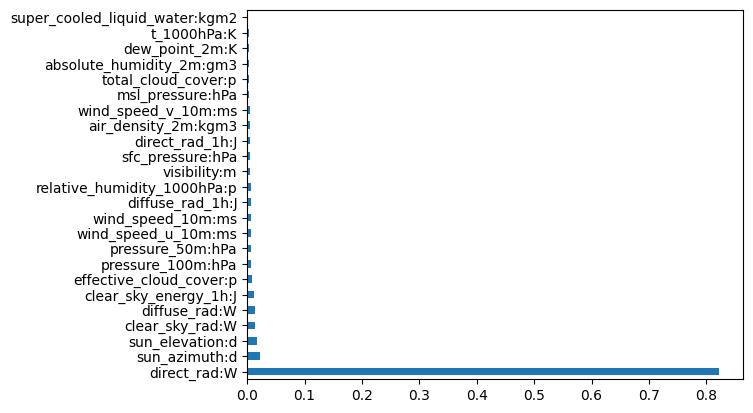

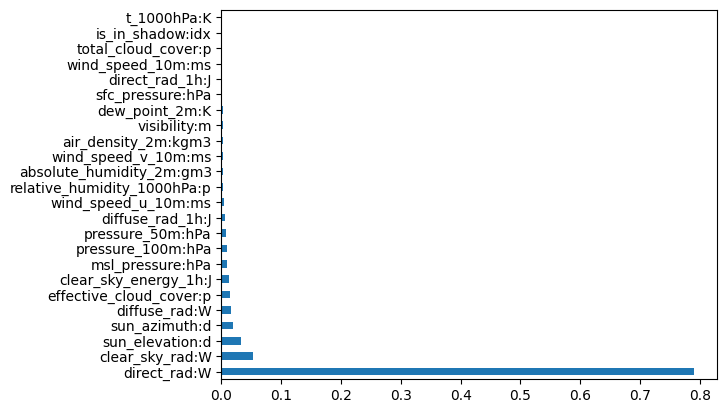

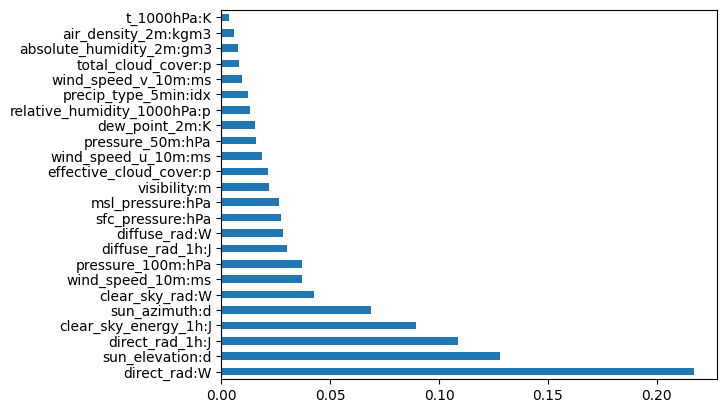

In [172]:

#train_a.columns = ["date_forecast", "pv_measurement"]
#train_a.set_index("date_forecast", inplace=True)

data = pd.concat([train_a, X_train_estimated_a_hourly], axis=1, join="inner") 

data.isnull().sum()

rows_with_null = data[data.isnull().any(axis=1)]

dates = rows_with_null.index

data = data.dropna()

data_without_direct_rad = data.drop(columns=["direct_rad:W", "direct_rad_1h:J"])

## With direct_rad features 
X = data.iloc[:,1:-1]  #independent columns
y = data.iloc[:,0]    #target column i.e price range

## witouth direct_rad features
# X = data_without_direct_rad.iloc[:,1:-1]  #independent columns
# y = data_without_direct_rad.iloc[:,0]    #target column i.e price range

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
import matplotlib.pyplot as plt

model = RandomForestRegressor()
model2 = GradientBoostingRegressor()
model3 = AdaBoostRegressor()
model.fit(X,y)
model2.fit(X, y)
model3.fit(X, y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(24).plot(kind='barh')
plt.show()

feat_importances2 = pd.Series(model2.feature_importances_, index=X.columns)
feat_importances2.nlargest(24).plot(kind='barh')
plt.show()

feat_importances3 = pd.Series(model3.feature_importances_, index=X.columns)
feat_importances3.nlargest(24).plot(kind='barh')
plt.show()
